In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("./"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

In [21]:
"""The problem that I am trying to solve, is to predict the price of a home in a certain area. For me, the area which I am trying to solve this for,
is the suburban region of Sammamish, Washington. Through utilizing a variety of different features regarding homes such as price, bedrooms, bathrooms,
square footage, and age, I plan to try to find a relationship between some of these features, and then use a random forest ML model to attempt to predict
the price."""

'The problem that I am trying to solve, is to predict the price of a home in a certain area. For me, the area which I am trying to solve this for,\nis the suburban region of Sammamish, Washington. Through utilizing a variety of different features regarding homes such as price, bedrooms, bathrooms,\nsquare footage, and age, I plan to try to find a relationship between some of these features, and then use a random forest ML model to attempt to predict\nthe price.'

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv("/home/jupyter-1000790/Project_2/data/Sammamish Data.csv")


"""The data was gathered through the usage of a data scraper for the Zillow website (Apify). It was found online, and it allowed me to choose which 
features could appear from the scraper. This includes ofthe number of beds, bathrooms, square footage, and age, which were available. The data scraper 
was ran once, and gave 1800 rows of data for homes in the Sammamish area for analysis and prediction of home value."""

'The data was gathered through the usage of a data scraper for the Zillow website (Apify). It was found online, and it allowed me to choose which \nfeatures could appear from the scraper. This includes ofthe number of beds, bathrooms, square footage, and age, which were available. The data scraper \nwas ran once, and gave 1800 rows of data for homes in the Sammamish area for analysis and prediction of home value.'

# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

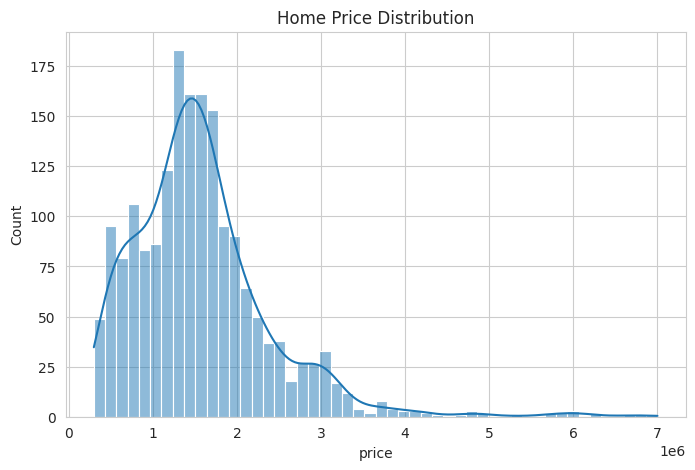

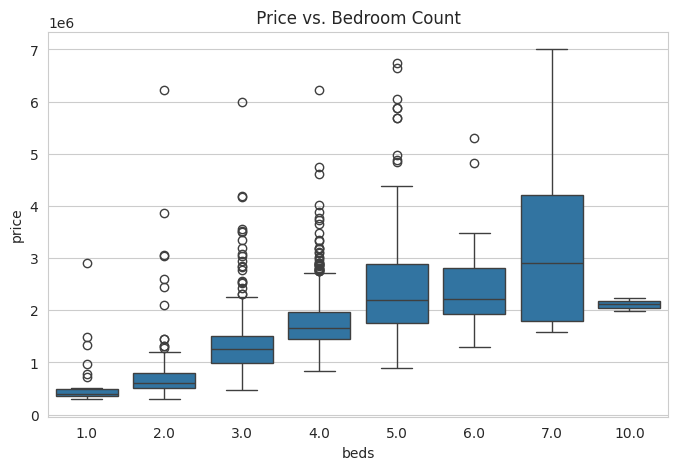

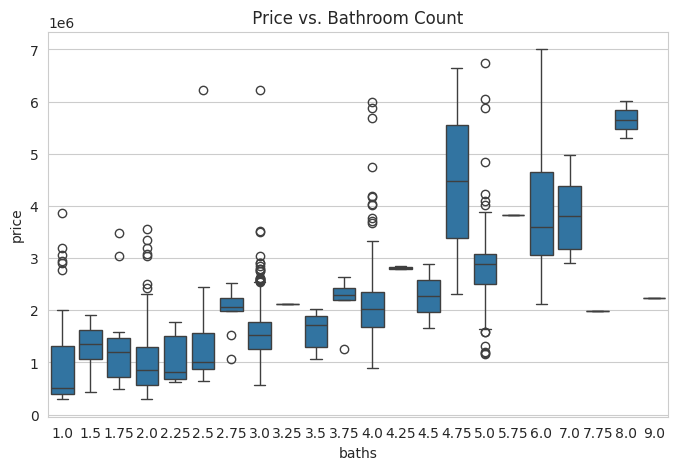

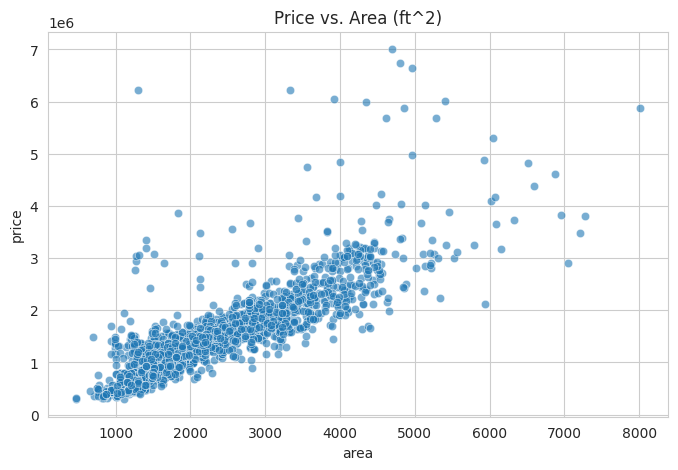

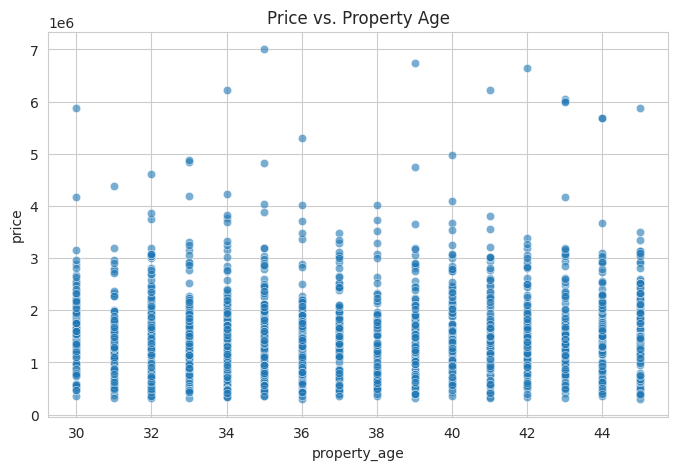

In [23]:
""" The data revealed that the distribution of house prices in the given area had a median of around 1.5 million, and was skewed to the right with many
outliers. Addtionally, it showed that there was a positive correlation between the price of a home, and its bedroom count, however, there were countless
outliers to that deduction. Moreover, it was determined that the same held true for price vs. bathroom count, just with more outliers. Finally, the one
indicator which really revealed a true correlation, was that of the relationship between house price and square footage, which had few outliers in
comparison to the other relationships. Finally, the age of the home revealed no major correlation, and proved to not be useful."""


plt.figure(figsize=(8,5))
sns.histplot(x='price', data = df, bins=50, kde=True)
plt.title("Home Price Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='beds', y='price', data=df)
plt.title(" Price vs. Bedroom Count ")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='baths', y='price', data=df)
plt.title(" Price vs. Bathroom Count ")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='area', y='price', data=df, alpha = 0.6)
plt.title("Price vs. Area (ft^2)")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='property_age', y='price', data=df,alpha = 0.6)
plt.title("Price vs. Property Age")
plt.show()


# 4.Prepare the Data


Apply any data transformations and explain what and why


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

features = ['beds', 'baths', 'area'] #Removed property age, since it didn't really play a role.
x = df[features]
y = df['price']

x = x.fillna(x.median()) # Filling in all the empty values with the median for that feature.

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

"""To prepare the data, I first extract the features I cared about the most, since those would impact the model's accuracy the most.  Also, I made sure
that there weren't any empty values so that the model wouldn't become confused. Finally, I set up all of the features for training, so I could use the
random forest model in the next step."""


"To prepare the data, I first extract the features I cared about the most, since those would impact the model's accuracy the most.  Also, I made sure\nthat there weren't any empty values so that the model wouldn't become confused. Finally, I set up all of the features for training, so I could use the\nrandom forest model in the next step."

# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


Mean Squared Error: 473929.44
R² Score: 0.6975


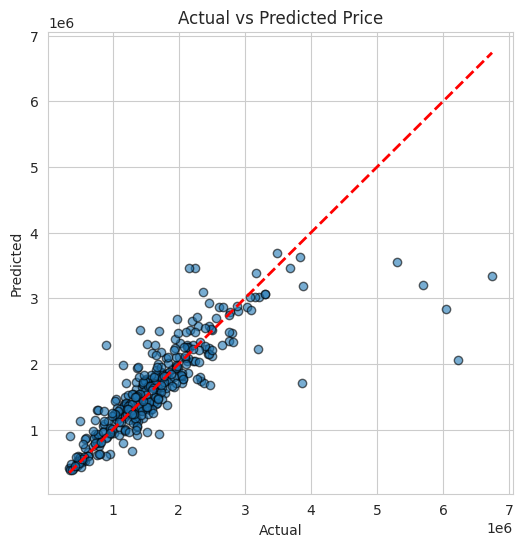

'I ultimately decided to use the random forest model, because I saw it gave me the best accuracy in comparison to the linear regression model. Additionally, because I thought it would\nbe the best model to track housing prices.'

In [50]:
# # Random Forest Model Verison 1.0
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# model = RandomForestRegressor( n_estimators=200, random_state=42, n_jobs=-1)

# 
# model.fit(x_train, y_train)

# 
# y_pred = model.predict(x_test)

# 
# mse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse:.2f}")
# print(f"R² Score: {r2:.4f}")

# plt.figure(figsize=(6,6))
# plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # reference line
# plt.xlabel("Actual")
# plt.ylabel("Predicted")
# plt.title("Actual vs Predicted Prices")
# plt.show()

# Random Forest Model Version 1.1 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# I made it so that the model would train on a, so that the accuracy would somewhat improve.
quartile_low, quartile_high = y_train.quantile([0.01, 0.99])
mask = (y_train >= quartile_low) & (y_train <= quartile_high)

x_train_clip = x_train[mask]
y_train_clip = y_train[mask]

model = RandomForestRegressor(n_estimators=200, random_state=42,n_jobs=-1)

model.fit(x_train_clip, y_train_clip)

y_pred = model.predict(x_test)

mse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Price")
plt.show()

"""I ultimately decided to use the random forest model, because I saw it gave me the best accuracy in comparison to the linear regression model. Additionally, because I thought it would
be the best model to track housing prices."""

# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [ ]:
def infrence(prams):
    results = m.run(prams)
    return results 